In [11]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def mean_absolute_percentage_accuracy(y_true, y_pred):
    """
    Tính độ chính xác phần trăm dựa trên MAPE
    Công thức: 100% - (trung bình tỷ lệ sai số tuyệt đối)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Kiểm tra để tránh chia cho 0
    if np.any(y_true == 0):
        print("Cảnh báo: Giá trị thực tế có chứa 0, loại bỏ các mẫu này để tính toán")
        mask = y_true != 0
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        if len(y_true) == 0:
            return 0.0
    
    # Tính MAPE và chuyển thành độ chính xác
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    
    return accuracy

In [12]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('data_gia.csv')

# Hiển thị thông tin cơ bản về dữ liệu
print("="*50)
print("THÔNG TIN DỮ LIỆU")
print("="*50)
print(data.info())
print("\n5 mẫu dữ liệu đầu tiên:")
print(data.head())

THÔNG TIN DỮ LIỆU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Diện tích (m2)    5000 non-null   int64
 1   Số phòng ngủ      5000 non-null   int64
 2   Số phòng tắm      5000 non-null   int64
 3   Năm xây dựng      5000 non-null   int64
 4   Vị trí (Mã vùng)  5000 non-null   int64
 5   Giá bán (VNĐ)     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB
None

5 mẫu dữ liệu đầu tiên:
   Diện tích (m2)  Số phòng ngủ  Số phòng tắm  Năm xây dựng  Vị trí (Mã vùng)  \
0             132             2             1          1950             55156   
1             136             4             3          2003             55156   
2             101             1             1          1996             55123   
3             218             4             3          1988             55111   
4              50             2          

In [13]:
# Kiểm tra giá trị thiếu
print("\nKIỂM TRA GIÁ TRỊ THIẾU")
print("="*50)
print(data.isnull().sum())


KIỂM TRA GIÁ TRỊ THIẾU
Diện tích (m2)      0
Số phòng ngủ        0
Số phòng tắm        0
Năm xây dựng        0
Vị trí (Mã vùng)    0
Giá bán (VNĐ)       0
dtype: int64


In [14]:
# Xử lý giá trị thiếu nếu có
if data.isnull().sum().any():
    print("\nXử lý giá trị thiếu...")
    data = data.dropna()
    print("Đã xóa các dòng có giá trị thiếu")

In [15]:
# Chia dữ liệu thành features (X) và target (y)
X = data[['Diện tích (m2)', 'Số phòng ngủ', 'Số phòng tắm', 'Năm xây dựng', 'Vị trí (Mã vùng)']]
y = data['Giá bán (VNĐ)']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Khởi tạo và huấn luyện mô hình
print("\nHUẤN LUYỆN MÔ HÌNH")
print("="*50)
model = LinearRegression()
model.fit(X_train, y_train)
print("Hoàn thành huấn luyện mô hình!")


HUẤN LUYỆN MÔ HÌNH
Hoàn thành huấn luyện mô hình!


In [17]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


In [18]:
# Tính các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape_accuracy = mean_absolute_percentage_accuracy(y_test, y_pred)

In [19]:
# Báo cáo kết quả
print("\nĐÁNH GIÁ MÔ HÌNH")
print("="*50)
print(f"- MSE: {mse:,.2f}")
print(f"- RMSE: {rmse:,.2f} VND")
print(f"- R2 Score: {r2:.4f}")
print(f"- Độ chính xác (MAPE-based): {mape_accuracy:.2f}%")


ĐÁNH GIÁ MÔ HÌNH
- MSE: 16,918,969,359,837,610.00
- RMSE: 130,072,938.61 VND
- R2 Score: 0.4012
- Độ chính xác (MAPE-based): 81.08%


In [20]:
save_dir = "exported_model"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "linearreg_model.pkl")
joblib.dump(model, model_path)

print(f"Mô hình đã được lưu vào file: '{model_path}'")

Mô hình đã được lưu vào file: 'exported_model\linearreg_model.pkl'


In [21]:
# Phân tích độ chính xác chi tiết
relative_errors = np.abs((y_test - y_pred) / y_test)
print("\nPHÂN TÍCH ĐỘ CHÍNH XÁC CHI TIẾT")
print("="*50)
print(f"- {np.mean(relative_errors <= 0.1)*100:.2f}% dự đoán có sai số ≤ 10%")
print(f"- {np.mean(relative_errors <= 0.2)*100:.2f}% dự đoán có sai số ≤ 20%")
print(f"- {np.mean(relative_errors <= 0.3)*100:.2f}% dự đoán có sai số ≤ 30%")


PHÂN TÍCH ĐỘ CHÍNH XÁC CHI TIẾT
- 28.10% dự đoán có sai số ≤ 10%
- 61.00% dự đoán có sai số ≤ 20%
- 83.00% dự đoán có sai số ≤ 30%


In [22]:
# Đánh giá hệ số của mô hình
print("\nHỆ SỐ MÔ HÌNH")
print("="*50)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:,.2f}")
print(f"Intercept (Bias): {model.intercept_:,.2f}")


HỆ SỐ MÔ HÌNH
Diện tích (m2): 989,223.88
Số phòng ngủ: 51,818,898.29
Số phòng tắm: 35,577,835.75
Năm xây dựng: -150,721.79
Vị trí (Mã vùng): -79,067.82
Intercept (Bias): 4,917,361,281.49


In [23]:
# Ví dụ dự đoán cho một ngôi nhà mới
print("\nDỰ ĐOÁN MẪU")
print("="*50)
new_house = pd.DataFrame({
    'Diện tích (m2)': [120],
    'Số phòng ngủ': [3],
    'Số phòng tắm': [2],
    'Năm xây dựng': [2005],
    'Vị trí (Mã vùng)': [55123]
})

predicted_price = model.predict(new_house)
print(f"Dự đoán giá nhà cho mẫu mới: {predicted_price[0]:,.2f} VND")


DỰ ĐOÁN MẪU
Dự đoán giá nhà cho mẫu mới: 602,027,896.71 VND


In [24]:
# Trực quan hóa kết quả
print("\nĐANG TẠO BIỂU ĐỒ...")
plt.figure(figsize=(15, 10))


ĐANG TẠO BIỂU ĐỒ...


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

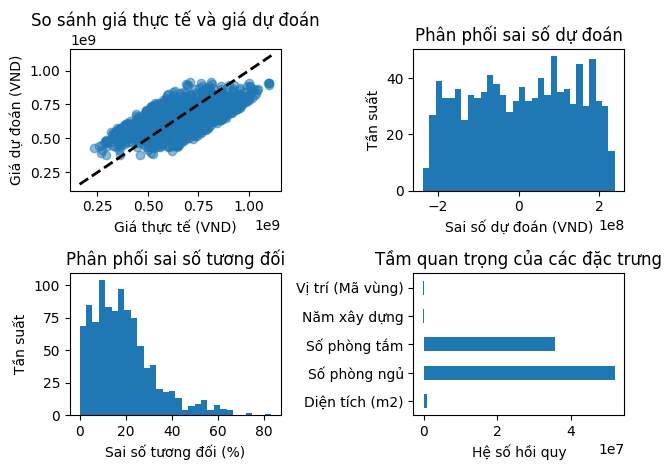

In [25]:
# Biểu đồ 1: So sánh giá thực tế và giá dự đoán
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Giá thực tế (VND)')
plt.ylabel('Giá dự đoán (VND)')
plt.title('So sánh giá thực tế và giá dự đoán')

# Biểu đồ 2: Phân phối sai số
plt.subplot(2, 2, 2)
errors = y_test - y_pred
plt.hist(errors, bins=30)
plt.xlabel('Sai số dự đoán (VND)')
plt.ylabel('Tần suất')
plt.title('Phân phối sai số dự đoán')

# Biểu đồ 3: Phân phối sai số tương đối (%)
plt.subplot(2, 2, 3)
relative_errors_pct = relative_errors * 100
plt.hist(relative_errors_pct, bins=30)
plt.xlabel('Sai số tương đối (%)')
plt.ylabel('Tần suất')
plt.title('Phân phối sai số tương đối')

# Biểu đồ 4: Feature importance (tầm quan trọng các đặc trưng)
plt.subplot(2, 2, 4)
coefs = pd.Series(model.coef_, index=X.columns)
coefs.plot(kind='barh')
plt.title('Tầm quan trọng của các đặc trưng')
plt.xlabel('Hệ số hồi quy')

plt.tight_layout()
plt.show()